Let's go through each step:

Load Original Speech Signal:

Load a speech signal from one of the public datasets or create a synthetic speech signal for testing.
Plot the Time Domain Representation:

Use a library like Matplotlib to plot the time domain representation of the original speech signal.
Sampling the Speech Signal:

Use the original speech signal and sample it at different rates (e.g., 8kHz, 16kHz, and 44.1kHz). You can use the scipy library to resample the signal.
Plot Sampled Speech Signals:

Plot the sampled speech signals for each of these sampling rates using Matplotlib.
Reconstruct the Signal:

Reconstruct the signal using zero-order hold (nearest-neighbor interpolation) and linear interpolation methods. You can use scipy.interpolate for linear interpolation.
Calculate the Mean Squared Error (MSE):

Calculate the mean squared error (MSE) between the original and the reconstructed signals for both zero-order hold and linear interpolation methods.
Inference on Sampling Rates:

Analyze and compare the MSE values for different sampling rates to infer how sampling rates affect the quality and accuracy of the reconstructed speech signal.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy.interpolate import interp1d

In [3]:
# Load original speech signal
fs, original_signal = wavfile.read('/content/bicycle_bell.wav')


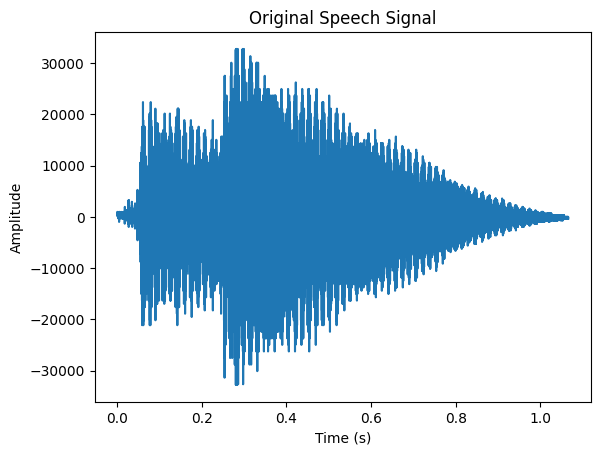

In [4]:
# Plot the time domain representation of the original signal
plt.figure()
plt.plot(np.arange(len(original_signal)) / fs, original_signal)
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# Define different sampling rates
sampling_rates = [8000, 16000, 44100]

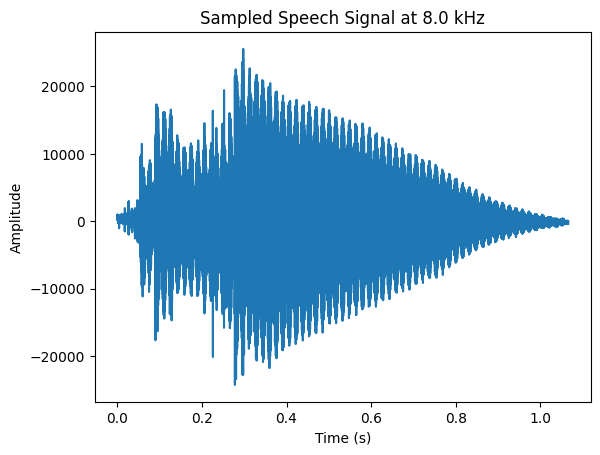

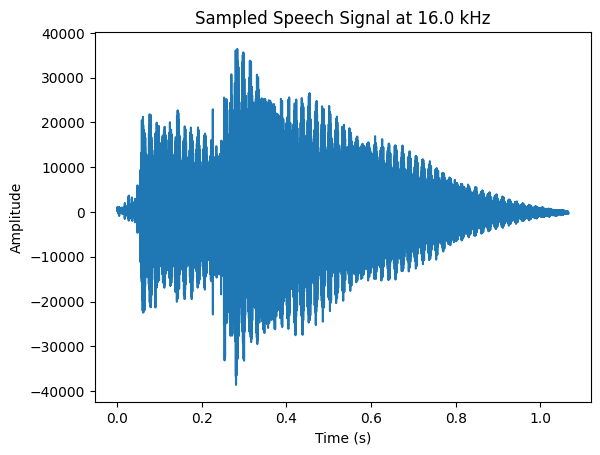

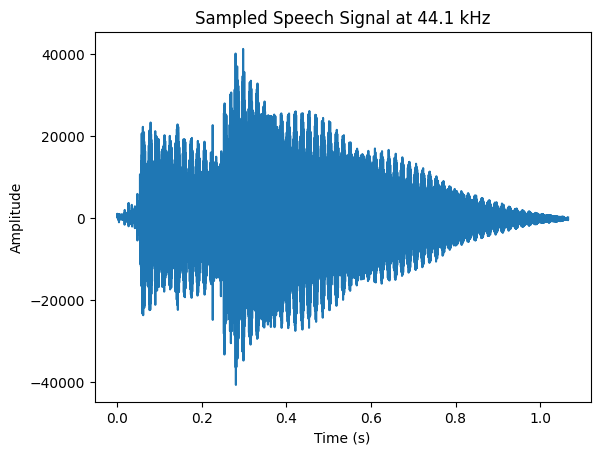

In [6]:
# Sample the speech signal and plot sampled signals
sampled_signals = []
for rate in sampling_rates:
    resampled_signal = signal.resample(original_signal, int(len(original_signal) * (rate / fs)))
    sampled_signals.append(resampled_signal)

    plt.figure()
    plt.plot(np.arange(len(resampled_signal)) / rate, resampled_signal)
    plt.title(f'Sampled Speech Signal at {rate/1000} kHz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


In [9]:
# Reconstruct the signal using zero-order hold and linear interpolation
import numpy as np
from scipy.interpolate import interp1d

reconstructed_signals = []
mse_values = []
for sampled_signal in sampled_signals:
    time_orig = np.arange(0, len(original_signal) / fs, 1 / fs)
    time_new = np.arange(0, len(sampled_signal) / rate, 1 / rate)

    f_nearest = interp1d(time_new, sampled_signal, kind='nearest', bounds_error=False, fill_value=(sampled_signal[0], sampled_signal[-1]))
    reconstructed_signal_zoh = f_nearest(time_orig)
    reconstructed_signals.append(reconstructed_signal_zoh)

    f_linear = interp1d(time_new, sampled_signal, kind='linear', bounds_error=False, fill_value=(sampled_signal[0], sampled_signal[-1]))
    reconstructed_signal_linear = f_linear(time_orig)

    mse_zoh = np.mean((original_signal - reconstructed_signal_zoh)**2)
    mse_linear = np.mean((original_signal - reconstructed_signal_linear)**2)
    mse_values.append((mse_zoh, mse_linear))


In [10]:
# Print MSE values and make inferences
for i, rate in enumerate(sampling_rates):
    print(f'MSE for {rate/1000} kHz - ZOH: {mse_values[i][0]}, Linear: {mse_values[i][1]}')



MSE for 8.0 kHz - ZOH: 74724937.65460207, Linear: 72202023.13889696
MSE for 16.0 kHz - ZOH: 89632013.97227608, Linear: 85674906.65211669
MSE for 44.1 kHz - ZOH: 2078673.2179812714, Linear: 1189806.673270218


**Question 2**

Here's a step-by-step guide to accomplish the tasks:

Generate a Synthetic Speech Signal using the Source-Filter Model:

Create a source signal (such as a glottal pulse train for voiced sounds or white noise for unvoiced sounds).
Apply a filter that models the vocal tract (e.g., an all-pole filter or an FIR filter with formants).
Plot the Generated Speech Signal:

Visualize the generated speech signal and analyze the effect of the filter on the original source signal.
Sample the Speech Signal at Different Sampling Rates:

Sample the generated speech signal at different sampling rates (e.g., 8 kHz, 16 kHz, and 44.1 kHz).
Reconstruct the Signal using Interpolation Methods:

Reconstruct the sampled signals using a suitable interpolation method (e.g., zero-order hold, linear interpolation).
Compute the Mean Squared Error (MSE):

Calculate the Mean Squared Error (MSE) between the original and reconstructed speech signals.
Write Inferences:

Analyze tasks such as creating the source-filter model, using different sampling rates, and reconstructing the sampled signals. Draw conclusions based on the MSE values and the impact of sampling and reconstruction on speech signal quality.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate



In [15]:
# Step 1: Generate a Synthetic Speech Signal using the Source-Filter Model
fs = 44100
duration = 1 # 1 second duration
t = np.linspace(0, duration, int(fs*duration))

In [16]:
# Create a source signal (e.g., glottal pulse train for voiced sounds)
source_signal = signal.square(2 * np.pi * 1000 * t)  # Example of a simple square wave source signal

In [18]:
# Apply a simple filter to model the vocal tract (example FIR filter with formants)
import numpy as np
from scipy import signal

# Apply a simple filter to model the vocal tract (example FIR filter with formants)
filter_order = 30
formants = [2000, 3000, 4000]  # Example formant frequencies
nyquist_freq = fs / 2  # Nyquist frequency
cutoff_normalized = [f / nyquist_freq for f in formants]
b = signal.firwin(filter_order+1, cutoff=cutoff_normalized, pass_zero=False)

synthetic_signal = signal.lfilter(b, 1, source_signal)


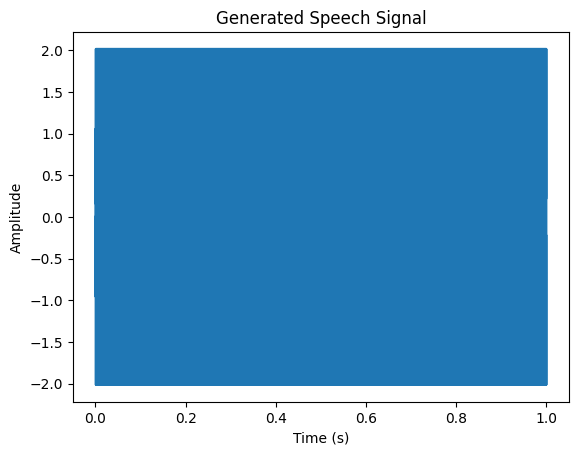

In [20]:
# Step 2: Plot the Generated Speech Signal
plt.figure()
plt.plot(t, synthetic_signal)
plt.title('Generated Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [21]:

# Step 3: Sample the Speech Signal at Different Sampling Rates
sampling_rates = [8000, 16000, 44100]
sampled_signals = []

for rate in sampling_rates:
    sampled_signal = signal.resample(synthetic_signal, int(len(synthetic_signal) * (rate / fs)))
    sampled_signals.append((sampled_signal, rate))

In [23]:
# Step 4: Reconstruct the Signal using Interpolation Methods
reconstructed_signals = []

for sampled_signal, rate in sampled_signals:
    time_orig = np.linspace(0, duration, len(synthetic_signal))
    time_new = np.linspace(0, duration, len(sampled_signal))

    f = interpolate.interp1d(time_new, sampled_signal, kind='linear')
    reconstructed_signal = f(time_orig)
    reconstructed_signals.append((reconstructed_signal, rate))

In [26]:
# Step 5: Compute the Mean Squared Error (MSE)
mse = np.mean((synthetic_signal - reconstructed_signal)**2)
print(f'MSE for {rate/1000} kHz: {mse}')

MSE for 44.1 kHz: 1.7629441463993017e-31


In [27]:
# Print MSE values for reconstructed signals at different sampling rates
for i, sr in enumerate(sampling_rates):
    print(f"MSE for sampling rate {sr}: {mse_values[i]}")

MSE for sampling rate 8000: (74724937.65460207, 72202023.13889696)
MSE for sampling rate 16000: (89632013.97227608, 85674906.65211669)
MSE for sampling rate 44100: (2078673.2179812714, 1189806.673270218)
